Detecting contours 
----------------------------
These are useful things when object detection has to be performed

In [10]:
import cv2 as cv
import numpy as np

In [11]:
img = cv.imread('Documents/a.jpg')

In [3]:
g_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('grayscale',g_img)
cv.waitKey(0)
cv.destroyWindow('grayscale')

In [4]:
#now i want to grab the edges of the image using canny edge detector
canny = cv.Canny(img,125,175)
#2 threshold values in canny
cv.imshow('canny',canny)
cv.waitKey(0)
cv.destroyWindow('canny')

In [5]:
#now use find contour method after edge 
#contours store the coordimates of edges it is a list not numpy array
#chain_approx_none stores all the coordimates instead using simple for a line edge is more reasonable and less resource intensive since to describe a line we only need 2 points
contours,heirarchies = cv.findContours(canny,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)
#contours,heirarchies = cv.findContours(canny,cv.RETR_EXTERNALT,cv.CHAIN_APPROX_NONE) RETURNS OUTER CONTOURS
#contours,heirarchies = cv.findContours(canny,cv.RETR_,cv.CHAIN_APPROX_NONE) RETURNS ALL HEIRARCHIES

In [6]:
print(len(contours))
#thresholding tries to binaries an image and reduce the number of contours!!!
#just by blurring the image we can reduce the number of contours
ret,thresh = cv.threshold(g_img,200,255,cv.THRESH_BINARY)
cv.imshow('thresholding',thresh)
cv.waitKey(0)
cv.destroyWindow('thresholding')
#i.e either go to 200 or 255 in pixel value entirely
#thresholding,blurring,dilation helps to reduce contours

830


In [7]:
blank = np.zeros((500,500,3),dtype = 'uint8')
cv.drawContours(blank,contours,-1,(0,255,0),1)
cv.imshow('idk',blank)
cv.waitKey(0)
cv.destroyWindow('idk')

In [8]:
contours1,heirarchies = cv.findContours(thresh,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)

blank1 = np.zeros((500,500,3),dtype = 'uint8')
cv.drawContours(blank1,contours1,-1,(0,255,0),1)
cv.imshow('idk1',blank1)
cv.waitKey(0)
cv.destroyWindow('idk1')

Above we have compared edges and contours it is clearly visible that using thresh image and canny images produces different results

Color spaces - switching between spaces HSV,LAB

In [12]:
c = cv.imread('Documents/c.jpg')

In [13]:
g_c = cv.cvtColor(c,cv.COLOR_BGR2GRAY)
cv.imshow('grayscale',g_c)
hsv_c = cv.cvtColor(c,cv.COLOR_BGR2HSV)
cv.imshow('gray',hsv_c)
cv.waitKey(0)
cv.destroyAllWindows

<function destroyAllWindows>

In [3]:
lab_c = cv.cvtColor(c,cv.COLOR_BGR2LAB)
cv.imshow('gray',lab_c)
cv.waitKey(0)
cv.destroyAllWindows

<function destroyAllWindows>

IN OPENCV we use BGR format which is the inverse of the RGB convention lets check this

In [2]:
import matplotlib.pyplot as plt

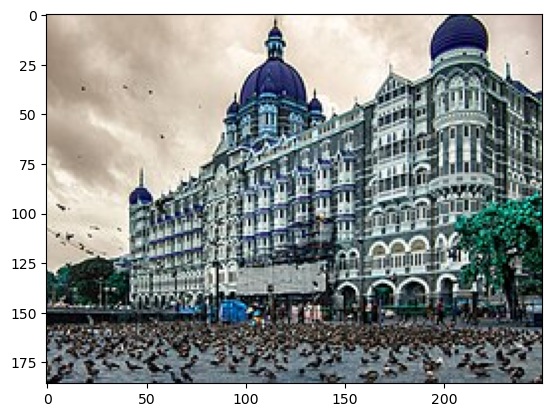

In [6]:
plt.imshow(c)
plt.show()

We do have a way to bridge from BGR TO RGB just use BGR2RGB but then opencv would show inversion

In [ ]:
bgr = cv.cvtColor(g_c,cv.COLOR_GRAY2BGR)
cv.imshow('convert',bgr)
cv.waitKey(0)
cv.destroyAllWindows
#no direct way for gray to hsv or lab only via bgr , from bgr we can go through any way